# Lab 3 - Machine Learning with `sklearn`
*Testing Performance of Models to Read Hand Written Notes*

**Author**: Daniel Carpenter


## `sklearn` and other Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import sklearn


from sklearn.datasets import fetch_openml
from sklearn import datasets, metrics
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split


## Import Data - Handwritten Numbers
* Note for later ML models, uses 66% of dataset to train models

In [2]:
# =============================================================================
# GET DATA
# See more info from here https://www.openml.org/d/554
# =============================================================================

# Data consists of hand written letters 
digits = datasets.load_digits()

# Data Transformation
X = digits.data / 255 # normalize between 0 and 1 - can improve performance

y = digits.target

# Percentage of sample to use in the test set
percSampleToUse = 0.66 

# Make the training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=percSampleToUse, 
                                                    random_state=9999)


## Exlore and Visualize Data
* Create a simple function to visualize what the hand written letter "looks" like in the data
* Show a few different letters in the data using a heatmap with `seaborn` package
* Note that the data is normalized from 0 to 1

In [3]:
# Simple function to show some handwritten numeric observations

def showNumber(df, numberObsNum = 0):
        
    # What does one sample number look like in the data?
    # -----------------------------------------------------------------------------
    sampleNumber = df[numberObsNum][:]
    
    NUM_ROWS_COLS = 8
    sampleOut = np.reshape(sampleNumber, (NUM_ROWS_COLS, NUM_ROWS_COLS))
    
    # Convert to DataFrame
    df_SampleNumber = pd.DataFrame(sampleOut)
    
    print('Here is what the number looks like with raw data (After putting in a 8x8 matrix): \n\n',
          df_SampleNumber)
    
    
    # How does it look like in a heat map perspective?
    # -----------------------------------------------------------------------------
    
    # Show a heatmap of the data
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Create the plot and heatmap
    fig, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(df_SampleNumber, cmap="Blues")
    
    # Add some styles and guides
    sns.set_style("whitegrid")
    plt.title('How the handwritten number appears in data\n One handwritten numeric observation of the MNIST Dataset\n')
    
    # The Axis'
    ax.set(ylabel = '"Rows" of Data')
    ax.set(xlabel = '"Columns" of Data')
    
    # Print and Show
    print('Note how the data looks like when putting it in a heatmap\n\n' )
    plt.show()


### Example of Possible Number: `2`

Here is what the number looks like with raw data (After putting in a 8x8 matrix): 

      0         1         2         3         4         5         6    7
0  0.0  0.000000  0.000000  0.019608  0.054902  0.047059  0.007843  0.0
1  0.0  0.000000  0.027451  0.058824  0.031373  0.054902  0.015686  0.0
2  0.0  0.000000  0.023529  0.007843  0.011765  0.050980  0.003922  0.0
3  0.0  0.000000  0.000000  0.003922  0.050980  0.015686  0.000000  0.0
4  0.0  0.000000  0.003922  0.043137  0.035294  0.000000  0.000000  0.0
5  0.0  0.031373  0.062745  0.050980  0.000000  0.000000  0.000000  0.0
6  0.0  0.019608  0.054902  0.062745  0.043137  0.007843  0.000000  0.0
7  0.0  0.000000  0.000000  0.023529  0.047059  0.050980  0.011765  0.0
Note how the data looks like when putting it in a heatmap




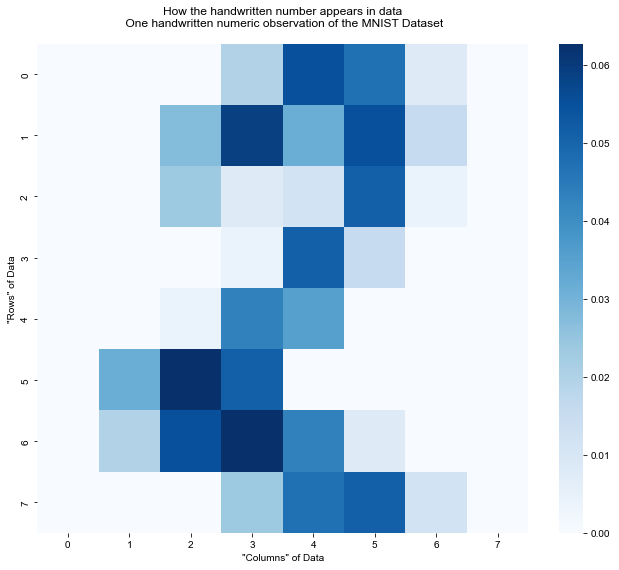

In [4]:
# Possible number: 2
showNumber(df=X, numberObsNum=50)


### Example of Possible Number: `9`

Here is what the number looks like with raw data (After putting in a 8x8 matrix): 

      0    1         2         3         4         5         6    7
0  0.0  0.0  0.003922  0.050980  0.039216  0.003922  0.000000  0.0
1  0.0  0.0  0.047059  0.023529  0.027451  0.039216  0.000000  0.0
2  0.0  0.0  0.039216  0.039216  0.043137  0.058824  0.000000  0.0
3  0.0  0.0  0.003922  0.054902  0.062745  0.062745  0.019608  0.0
4  0.0  0.0  0.000000  0.000000  0.000000  0.039216  0.039216  0.0
5  0.0  0.0  0.000000  0.000000  0.000000  0.019608  0.043137  0.0
6  0.0  0.0  0.007843  0.015686  0.015686  0.054902  0.043137  0.0
7  0.0  0.0  0.007843  0.043137  0.058824  0.062745  0.019608  0.0
Note how the data looks like when putting it in a heatmap




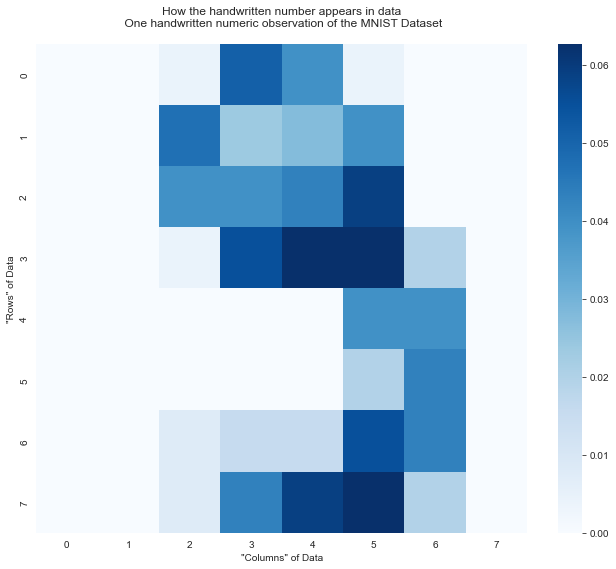

In [5]:
# Possible number: 9
showNumber(df=X, numberObsNum=1616)


### Example of Possible Number: `6`

Here is what the number looks like with raw data (After putting in a 8x8 matrix): 

      0         1         2         3         4         5         6    7
0  0.0  0.000000  0.011765  0.054902  0.011765  0.000000  0.000000  0.0
1  0.0  0.000000  0.050980  0.050980  0.000000  0.000000  0.000000  0.0
2  0.0  0.000000  0.062745  0.027451  0.000000  0.000000  0.000000  0.0
3  0.0  0.019608  0.062745  0.011765  0.000000  0.000000  0.000000  0.0
4  0.0  0.011765  0.062745  0.027451  0.015686  0.007843  0.000000  0.0
5  0.0  0.015686  0.062745  0.062745  0.062745  0.062745  0.027451  0.0
6  0.0  0.003922  0.054902  0.058824  0.015686  0.043137  0.058824  0.0
7  0.0  0.000000  0.019608  0.054902  0.062745  0.047059  0.023529  0.0
Note how the data looks like when putting it in a heatmap




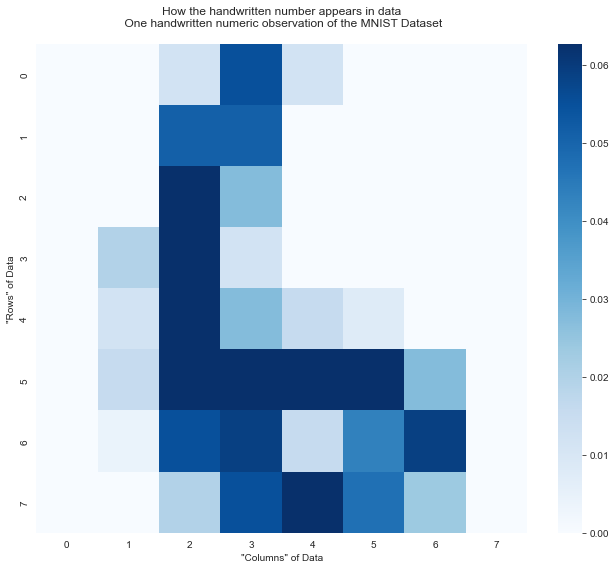

In [6]:
# Possible number: 6
showNumber(df=X, numberObsNum=212)


### Example of Possible Number: `3`

Here is what the number looks like with raw data (After putting in a 8x8 matrix): 

      0         1         2         3         4         5         6    7
0  0.0  0.000000  0.035294  0.062745  0.062745  0.047059  0.007843  0.0
1  0.0  0.011765  0.050980  0.019608  0.015686  0.054902  0.019608  0.0
2  0.0  0.000000  0.000000  0.000000  0.027451  0.058824  0.007843  0.0
3  0.0  0.000000  0.000000  0.019608  0.062745  0.043137  0.000000  0.0
4  0.0  0.000000  0.000000  0.000000  0.031373  0.062745  0.027451  0.0
5  0.0  0.000000  0.000000  0.000000  0.000000  0.050980  0.031373  0.0
6  0.0  0.000000  0.015686  0.019608  0.019608  0.058824  0.015686  0.0
7  0.0  0.000000  0.047059  0.062745  0.058824  0.019608  0.000000  0.0
Note how the data looks like when putting it in a heatmap




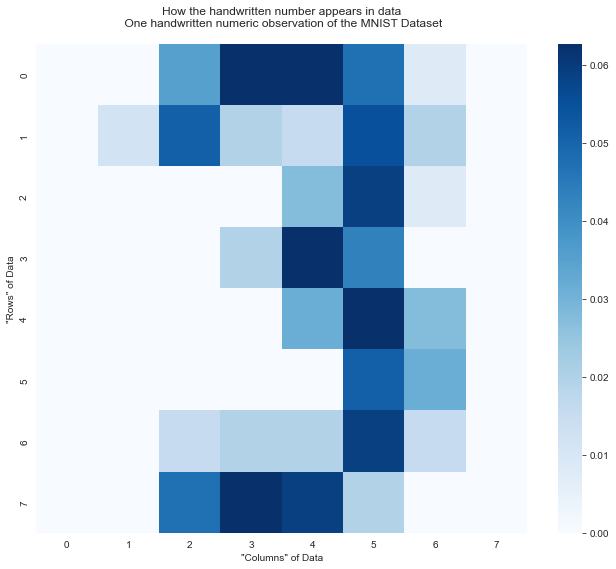

In [7]:
# Possible number: 3
showNumber(df=X, numberObsNum=1300)


### Example of Possible Number: `3` Again

Here is what the number looks like with raw data (After putting in a 8x8 matrix): 

      0         1         2         3         4         5         6    7
0  0.0  0.000000  0.035294  0.058824  0.054902  0.007843  0.000000  0.0
1  0.0  0.000000  0.035294  0.011765  0.035294  0.031373  0.000000  0.0
2  0.0  0.000000  0.000000  0.000000  0.023529  0.039216  0.000000  0.0
3  0.0  0.000000  0.000000  0.039216  0.058824  0.007843  0.000000  0.0
4  0.0  0.000000  0.007843  0.039216  0.043137  0.058824  0.007843  0.0
5  0.0  0.011765  0.003922  0.000000  0.000000  0.054902  0.015686  0.0
6  0.0  0.039216  0.050980  0.027451  0.007843  0.047059  0.015686  0.0
7  0.0  0.000000  0.027451  0.054902  0.062745  0.039216  0.000000  0.0
Note how the data looks like when putting it in a heatmap




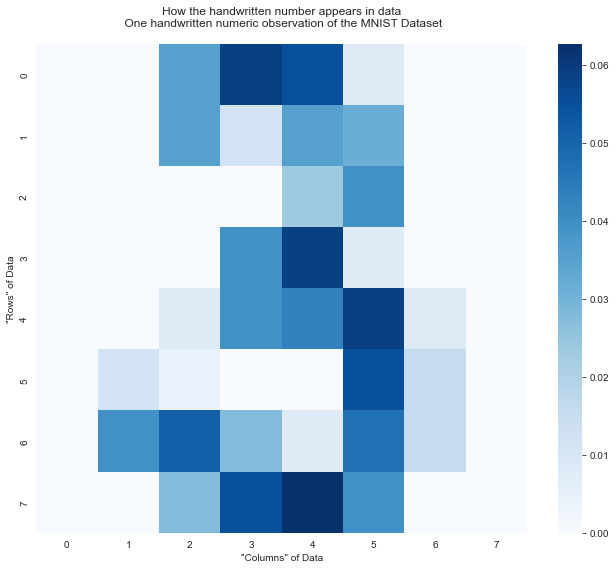

In [8]:
# Possible number: Another 3
showNumber(df=X, numberObsNum=999)


## Fit ML Classifier Models - Supervised Machine Learning
> Goal is to use sample hand written letters to read and predict more letters

### Simple Function to Measure the Time to Execute Modeling

In [9]:
import time

def startClock():
    return time.time()

def endClock(start_time, name):
    print("\nTime to", name, ": %g" % (time.time() - start_time))

### `1` Naive Bayes

In [10]:
# =============================================================================
# Fit Classifier Models
# =============================================================================

# 1 - Naive Bayes 
# -----------------------------------------------------------------------------

# 0 - Import the classifer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Initialize the classifier
gnb = GaussianNB()

# 2. Train (fit) the classifier
start_time = startClock()
model = gnb.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
preds = gnb.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nNaive Bayes Training Score: {:,.4f}'.format( gnb.score(X_train, y_train) ))
print('Naive Bayes Test Score: {:,.4f}'.format( gnb.score(X_test, y_test) ))
# 5. Interprest false and true positives
expected  = y_test
predicted = preds
print('Confusion Matrix\n', sklearn.metrics.confusion_matrix(expected, predicted))



Time to Train : 0.00554276

Time to Test : 0.00848961

Naive Bayes Training Score: 0.9197
Naive Bayes Test Score: 0.8391
Confusion Matrix
 [[119   0   0   0   3   2   0   0   0   0]
 [  0  86   0   0   1   1   1   1  14   9]
 [  0   3  83   4   0   0   2   0  32   0]
 [  0   0   5  97   0   3   1   4  10   1]
 [  0   1   0   0  89   2   0   8   6   0]
 [  0   0   0   3   0 101   0   4   1  10]
 [  0   0   0   0   0   2 122   0   0   0]
 [  0   0   0   0   2   1   0 107   3   1]
 [  0   5   0   1   0   6   0   1  98   0]
 [  0   1   4   3   0   7   1   8  13  94]]


### `2` Random Forest

In [11]:
# 2 - Random Forest 
# -----------------------------------------------------------------------------

# 0 - Import the classifer
from sklearn.ensemble import RandomForestClassifier 

# 1. Initialize the classifier
forest = RandomForestClassifier(n_estimators = 100)

# 2. Train (fit) the classifier
start_time = startClock()
forest.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
predictions = forest.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nRandom Forest Training Score: {:,.4f}'.format( forest.score(X_train, y_train) ))
print('Random Forest Test Score: {:,.4f}'.format( forest.score(X_test, y_test) ))

# 5. Interprest false and true positives
expected  = y_test
predicted = predictions
print('Confusion Matrix\n', sklearn.metrics.confusion_matrix(expected, predicted))



Time to Train : 0.539184

Time to Test : 0.0755911

Random Forest Training Score: 1.0000
Random Forest Test Score: 0.9469
Confusion Matrix
 [[122   0   0   0   2   0   0   0   0   0]
 [  0 111   0   1   0   0   0   0   0   1]
 [  0   0 122   0   0   0   0   0   2   0]
 [  0   0   0 106   0   2   0   3   7   3]
 [  0   2   0   0 101   0   0   2   1   0]
 [  0   0   0   1   1 113   1   0   0   3]
 [  1   0   0   0   0   1 122   0   0   0]
 [  0   0   0   0   0   0   0 113   1   0]
 [  0   5   2   0   0   2   0   0 101   1]
 [  0   3   0   5   0   2   0   3   5 113]]


### `3` KNN (K-Nearest Neighbors)

In [12]:
# 3 - K-Nearest Neighbors
# -----------------------------------------------------------------------------

# 0 - Import the classifer
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialize the classifier
neigh = KNeighborsClassifier(n_neighbors=3)

# 2. Train (fit) the classifier (3. predictions made in this step too)
start_time = startClock()
neigh.fit(X, y)
endClock(start_time, 'Test & Train')

# 4. Evaluate accuracy - note does test and train at same time (hence greedy)
print('\nKNN Accuracy Score: {:,.4f}'.format( neigh.score(X, y) ))



Time to Test & Train : 0.00315356

KNN Accuracy Score: 0.9933


### `4` Multi-Linear Perceptron using SGD

In [13]:
# 4 - Multi-Linear Perceptron using SGD
# ‘sgd’ refers to stochastic gradient descent.
# -----------------------------------------------------------------------------
# 0 - Import the classifer
from sklearn.neural_network import MLPClassifier

# 1. Initialize the classifier
mlp_sgd = MLPClassifier(hidden_layer_sizes=(100,), 
                    max_iter=100, 
                    alpha=1e-4, 
                    solver="sgd",
                    verbose = 10, 
                    tol=1e-4, 
                    random_state=1, 
                    learning_rate_init=.1)

# 2. Train (fit) the classifier 
start_time = startClock()
mlp_sgd.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
predictions = mlp_sgd.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nMLP with SGD Training Score: {:,.4f}'.format( mlp_sgd.score(X_train, y_train) ))
print('MLP with SGD Test Score: {:,.4f}'.format( mlp_sgd.score(X_test, y_test) ))

# 5. Interprest false and true positives
expected  = y_test
predicted = predictions
print('Confusion Matrix\n', sklearn.metrics.confusion_matrix(expected, predicted))


Iteration 1, loss = 2.30517707
Iteration 2, loss = 2.30239673
Iteration 3, loss = 2.29936229
Iteration 4, loss = 2.29575699
Iteration 5, loss = 2.29135455
Iteration 6, loss = 2.28616264
Iteration 7, loss = 2.28274996
Iteration 8, loss = 2.28201986
Iteration 9, loss = 2.28395448
Iteration 10, loss = 2.27393388
Iteration 11, loss = 2.26543776
Iteration 12, loss = 2.25792942
Iteration 13, loss = 2.25653326
Iteration 14, loss = 2.25713101
Iteration 15, loss = 2.24310935
Iteration 16, loss = 2.23313753
Iteration 17, loss = 2.22877945
Iteration 18, loss = 2.22673420
Iteration 19, loss = 2.22740286
Iteration 20, loss = 2.20803298
Iteration 21, loss = 2.19006124
Iteration 22, loss = 2.18013367
Iteration 23, loss = 2.17375135
Iteration 24, loss = 2.16434137
Iteration 25, loss = 2.15350407
Iteration 26, loss = 2.13615914
Iteration 27, loss = 2.11876977
Iteration 28, loss = 2.10468269
Iteration 29, loss = 2.09380080
Iteration 30, loss = 2.07297024
Iteration 31, loss = 2.04686767
Iteration 32, los

C:\Users\daniel.carpenter\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### `5` Multi-Linear Perceptron using Adam

In [14]:
# 5 - Multi-Linear Perceptron using Adam
# ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# -----------------------------------------------------------------------------
# 0 - Import the classifer
# from sklearn.neural_network import MLPClassifier # done in last MLP

# 1. Initialize the classifier
mlp_lbfgs = MLPClassifier(hidden_layer_sizes=(100,), 
                    max_iter=100, 
                    alpha=1e-4, 
                    solver="adam",
                    verbose = 10, 
                    tol=1e-4, 
                    random_state=1, 
                    learning_rate_init=.1)

# 2. Train (fit) the classifier
start_time = startClock()
mlp_lbfgs.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
predictions = mlp_lbfgs.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nMLP with Adam Training Score: {:,.4f}'.format( mlp_lbfgs.score(X_train, y_train) ))
print('MLP with Adam Test Score: {:,.4f}'.format( mlp_lbfgs.score(X_test, y_test) ))

# 5. Interprest false and true positives
expected  = y_test
predicted = predictions
print('Confusion Matrix\n', sklearn.metrics.confusion_matrix(expected, predicted))


Iteration 1, loss = 2.29738922
Iteration 2, loss = 1.97484224
Iteration 3, loss = 1.51150804
Iteration 4, loss = 1.04676527
Iteration 5, loss = 0.79868446
Iteration 6, loss = 0.63496771
Iteration 7, loss = 0.49448351
Iteration 8, loss = 0.44103813
Iteration 9, loss = 0.39629388
Iteration 10, loss = 0.29293963
Iteration 11, loss = 0.30757696
Iteration 12, loss = 0.26280413
Iteration 13, loss = 0.21901898
Iteration 14, loss = 0.18606002
Iteration 15, loss = 0.18404810
Iteration 16, loss = 0.15014375
Iteration 17, loss = 0.14196837
Iteration 18, loss = 0.12059982
Iteration 19, loss = 0.10531612
Iteration 20, loss = 0.11912493
Iteration 21, loss = 0.11964396
Iteration 22, loss = 0.19086180
Iteration 23, loss = 0.17033952
Iteration 24, loss = 0.16323519
Iteration 25, loss = 0.25410510
Iteration 26, loss = 0.11735348
Iteration 27, loss = 0.19711267
Iteration 28, loss = 0.12706308
Iteration 29, loss = 0.13207849
Iteration 30, loss = 0.14648895
Training loss did not improve more than tol=0.000

### `6` SVM (Support Vector Machine)

In [15]:
# 6 - SVM (Support Vector Machine)
# https://scikit-learn.org/stable/modules/svm.html#classification
# -----------------------------------------------------------------------------

# 0 - Import the classifer
from sklearn import svm

# 1. Initialize the classifier
svm_model = svm.SVC()

# 2. Train (fit) the classifier
start_time = startClock()
svm_model.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
predictions = svm_model.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nSVM Training Score: {:,.4f}'.format( svm_model.score(X_train, y_train) ))
print('SVM Test Score: {:,.4f}'.format( svm_model.score(X_test, y_test) ))

# 5. Interprest false and true positives
expected  = y_test
predicted = predictions
print('Confusion Matrix\n', sklearn.metrics.confusion_matrix(expected, predicted))



Time to Train : 0.0435884

Time to Test : 0.206168

SVM Training Score: 0.9902
SVM Test Score: 0.9671
Confusion Matrix
 [[123   0   0   0   1   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   1 111   0   2   0   1   5   1]
 [  0   0   0   0 103   0   0   0   3   0]
 [  0   0   0   0   0 117   1   0   0   1]
 [  0   1   0   0   0   1 122   0   0   0]
 [  0   0   0   0   0   0   0 113   1   0]
 [  0   8   0   0   0   0   0   0 102   1]
 [  0   2   0   0   0   1   0   3   5 120]]


### `7` Bayesian Ridge Regression

In [16]:
# 7 - Bayesian Ridge Regression
# https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression# -----------------------------------------------------------------------------

# 0 - Import the classifer
from sklearn import linear_model

# 1. Initialize the classifier
bayes_ridgeReg = linear_model.BayesianRidge()

# 2. Train (fit) the classifier
start_time = startClock()
bayes_ridgeReg.fit(X_train, y_train)
endClock(start_time, 'Train')

# 3. Make predictions
start_time = startClock()
predictions = bayes_ridgeReg.predict(X_test)
endClock(start_time, 'Test')

# 4. Evaluate accuracy
print('\nBayesian Ridge Reg. Training Score: {:,.4f}'.format( bayes_ridgeReg.score(X_train, y_train) ))
print('Bayesian Ridge Reg. Test Score: {:,.4f}'.format( bayes_ridgeReg.score(X_test, y_test) ))



Time to Train : 0.0300879

Time to Test : 0.00199938

Bayesian Ridge Reg. Training Score: 0.6077
Bayesian Ridge Reg. Test Score: 0.5438



# Summary of Supervised ML Classifier Models
### 1. Which model is the most accurate on the test set?
* The best model was the **support vector machine model (SVM)**, which had a test score of 0.967

### 2. Which model is the fastest to train?
* The model the was the fastest to train was the **Naive Bayes**
* Not including KNN since was both training and testing at same time

### 3. Which model is the fastest to classify new data (the test set)?
* The model that was fastest to classify new data was the **Bayesian Ridge Regression**
* Again, not including KNN since was both training and testing at same time  

    
### 4. Which model is the best?
* The **SVM model** proves to predict out of sample and sample data very well, which looks to be the best overall
* Note that the the random forest model may have been better, but it appears to overfit the training data, which could be an issue for out of sample prediction.
